## Introdução ao ML - Exemplo Prático

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#Criando o conjunto de dados
data = {'x': [1.65, 1.5, 1.7, 1.92, 1.54, 1.6, 1.71, 1.55, 1.67, 1.81, 1.59],
       'y': ['M', 'B', 'M', 'A', 'B', 'M', 'A', 'B', 'M', 'A', 'B']}

In [2]:
type(data)

dict

In [4]:
#Criando um dataframe com os dados gerados e colunas x e y
df = pd.DataFrame(data)

In [9]:
# Mostrar df
df.head()

,x,y
0,1.65,M
1,1.50,B
2,1.70,M
3,1.92,A
4,1.54,B


#### Criando o algoritmo de forma explícita

In [10]:
#Definindo uma classe para representar o modelo
class Model():
    def predict(self, x):
        if x < 1.6:
            return 'B'
        elif x <= 1.7:
            return 'M'
        else:
            return 'A'

In [13]:
#Instanciando um modelo
model = Model()

#Realizando a predição
new_data = 1.705
y_predict = model.predict(new_data)
print('Predicted class: ', y_predict)

Predicted class:  A


#### Usando um algoritmo de árvore de decisão

In [14]:
#Importando a lib para usar treinar um modelo baseado em árvores de decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [29]:
X_train

array([[1.65, 1.5 , 1.7 , 1.92, 1.54, 1.6 , 1.71, 1.55, 1.67, 1.81, 1.59]])

In [32]:
#Separando os dados de entrada (atributos preditivos) e saída (atributo alvo/target)
X_train = df[['x']]
y_train = df['y']

In [49]:
#Criando um modelo de classificação - DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=2, random_state=43)

#Treinando o modelo
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [50]:
#Realizando a predição
new_data = [[1.71], [1.62], [1.54]]
y_pred = tree_model.predict(new_data)
print('Predicted class: ', y_pred)

Predicted class:  ['A' 'M' 'B']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


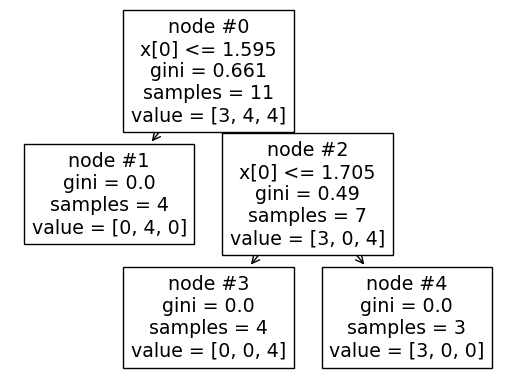

In [51]:
#Visualizando a árvore de decisão criada pelo modelo
plot = tree.plot_tree(tree_model, node_ids=True)

### Grau de obesidade

In [52]:
# M = Magreza, N = Normal, S = Sobrepeso, O = obesidade, OG = obesidade grave
data = {'altura': [1.65, 1.7, 1.7, 1.65, 1.81, 1.9, 1.85, 1.80, 1.78, 1.6],
       'peso': [67, 65, 53, 80, 120, 65, 140, 110, 90, 105],
       'class': ['N', 'N', 'M', 'S', 'O', 'M', 'OG', 'O', 'S', 'OG']}

In [53]:
#Criando um dataframe com os dados gerados e colunas x e y
df = pd.DataFrame(data)

In [54]:
df

,altura,peso,class
0,1.65,67,N
1,1.70,65,N
2,1.70,53,M
3,1.65,80,S
4,1.81,120,O
5,1.90,65,M
6,1.85,140,OG
7,1.80,110,O
8,1.78,90,S
9,1.60,105,OG


In [55]:
#Separando os dados de entrada (atributos preditivos) e saída (atributo alvo/target)
X_train = df[['altura', 'peso']]
y_train = df['class']

In [56]:
#Criando um modelo de classificação - DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=41)

#Treinando o modelo
tree_model.fit(X_train.values, y_train)

DecisionTreeClassifier(random_state=41)

In [57]:
#Realizando a predição
# M = Magreza, N = Normal, S = Sobrepeso, O = obesidade, OG = obesidade grave
new_data = [[1.71, 80], [1.62, 50], [1.55, 90]]
y_pred = tree_model.predict(new_data)
print('Predicted class: ', y_pred)

Predicted class:  ['S' 'N' 'S']


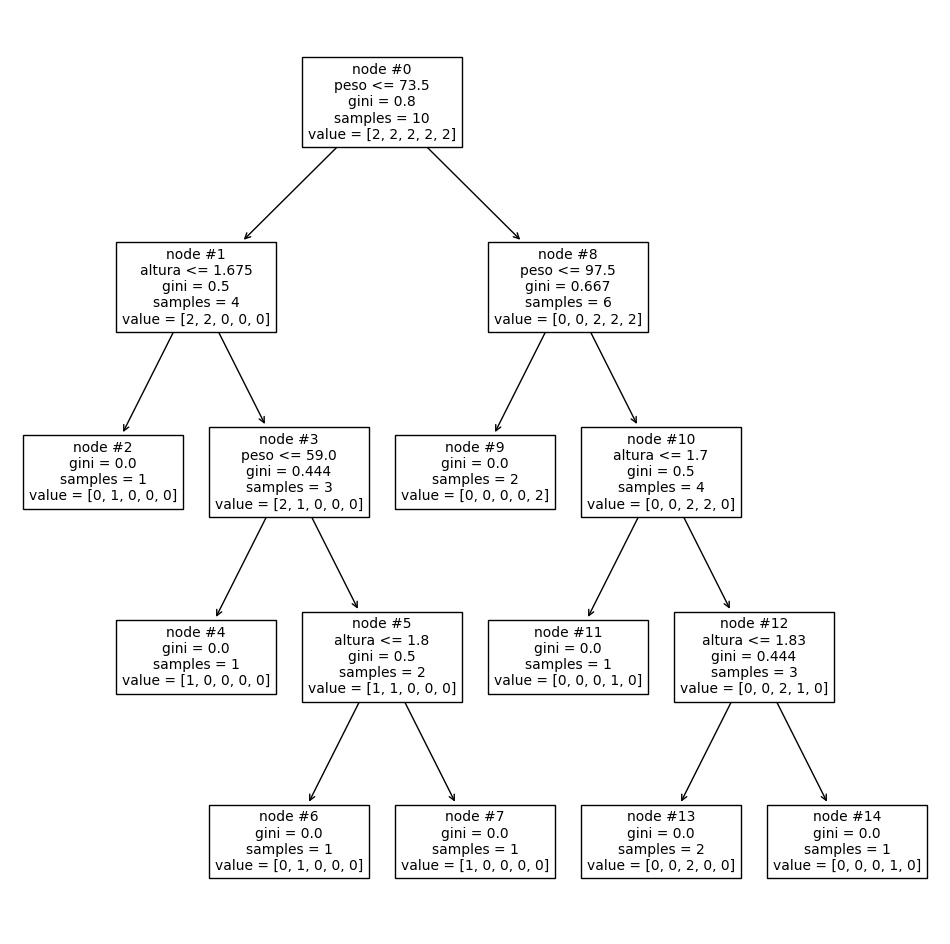

In [58]:
#Visualizando a árvore de decisão criada pelo modelo
plt.figure(figsize=(12,12))
plot = tree.plot_tree(tree_model, node_ids=True, fontsize=10, feature_names=['altura', 'peso'])

In [59]:
df_imc = df.copy()
df_imc['imc'] = df_imc['peso'] / df_imc['altura']**2

In [60]:
df_imc.head()

,altura,peso,class,imc
0,1.65,67,N,24.609734
1,1.70,65,N,22.491349
2,1.70,53,M,18.339100
3,1.65,80,S,29.384757
4,1.81,120,O,36.628919


In [61]:
#Separando os dados de entrada (atributos preditivos) e saída (atributo alvo/target)
X_train = df_imc[['altura', 'peso', 'imc']]
y_train = df_imc['class']

In [62]:
#Criando um modelo de classificação - DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

#Treinando o modelo
tree_model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [63]:
#Realizando a predição
#M = Magreza, N = Normal, S = Sobrepeso, O = obesidade, OG = obesidade grave
new_data = [[1.71, 80, 27.36], [1.62, 50, 19.05], [1.55, 90, 37.46]]
#new_data = [[27.36], [19.05], [37.46]]
# Predicted class:  ['S' 'N' 'S']
y_pred = tree_model.predict(new_data)
print('Predicted class: ', y_pred)

Predicted class:  ['S' 'M' 'S']


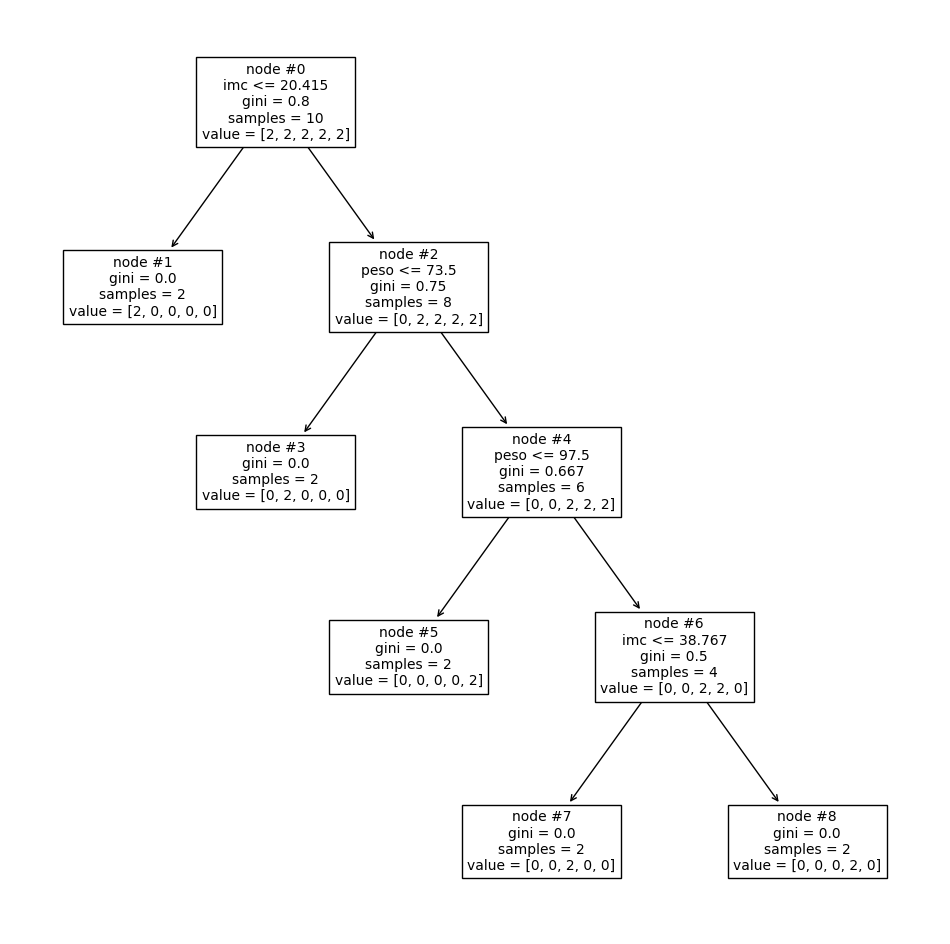

In [64]:
#Visualizando a árvore de decisão criada pelo modelo
plt.figure(figsize=(12,12))
plot = tree.plot_tree(tree_model, node_ids=True, fontsize=10,
                      feature_names=X_train.columns)